# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [120]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

UsageError: Line magic function `%` not found.


# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [121]:
def find_product(a, r, N):
    ## Your code here
    arr_product = []
    b_prev = a
    arr_product.append(b_prev)
    for i in range(1, N):
        b_cur = b_prev * r
        arr_product.append(b_cur)
        b_prev = b_cur
    return arr_product


a = 2
r = 3
N = 3
print(find_product(a, r, N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [122]:
def check_palindrome(N):
    reversed_str = ''.join(reversed(str(N)))
    if str(N) != reversed_str:
        return False
    else:
        return True


for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [123]:
def find_palindromes(N):
    palindrome_nums = []
    first = 1000
    while N > 0:
        if check_palindrome(first):
            palindrome_nums.append(first)
            N -= 1
        first += 1
    return palindrome_nums


print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [124]:
from random import randint


def find_min(a, b, c):
    ## Your code here
    min_num = a
    if min_num > b:
        min_num = b
    if min_num > c:
        min_num = c
    return min_num


for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-62 -66 9 	Minimum: -66
25 24 23 	Minimum: 23
-70 -2 -92 	Minimum: -92
-58 -12 58 	Minimum: -58
-30 53 81 	Minimum: -30
-65 74 14 	Minimum: -65
-53 22 51 	Minimum: -53
-25 25 54 	Minimum: -25
93 -21 88 	Minimum: -21
-58 -92 98 	Minimum: -92


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [125]:
tmp_array = np.random.rand(17)  ## Your code here
divider = np.sum(tmp_array)
my_array = np.array((tmp_array / divider) * 6)
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 5.999999999999999


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [126]:
def calculate_manhattan(a, b):
    ## Your code here
    distance = np.sum(np.abs(a - b))

    return distance


def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum(np.square(a - b)))
    ## Your code here
    return distance


def calculate_chebyshev(a, b):
    ## Your code here
    distance = np.abs(a - b).max()
    return distance


def calculate_cosine(a, b):
    ## Your code here
    distance = np.dot(a, b) / (np.abs(np.sqrt(np.sum(a ** 2))) * np.abs(np.sqrt(np.sum(b ** 2))))
    return distance

In [127]:
a = np.random.rand(200)  ## Your code here
b = np.random.rand(200)  ## Your code here
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 69.41459939673464
Euclidean distance: 5.8736179859076305
Chebyshev distance: 0.9381604245452312
Cosine distance: 0.7350471135593747


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [128]:
def transform(array):
    ## Your code here
    transform_array = np.where(array > -1, -1, array)
    transform_array = np.where(transform_array < -4, -4, transform_array)
    transform_array = np.sort(transform_array)
    return transform_array

In [129]:
my_array = np.random.randint(-20, 38, size=76)  ## Your code here
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4
Max: -1
Array:
[-4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -3 -2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [130]:
my_array = np.random.randint(-7, 43, size=(8, 5))  ## Your code here
selected_column = my_array[:, np.argmax(np.max(my_array, axis=0))]  ## Your code here
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[-1 27  0 16 13]
 [ 7  8 12  1 33]
 [ 3  7 36 19 34]
 [17 -2 31  8 -6]
 [13 10 17 39 -6]
 [-6 30 18 16 -1]
 [ 3 27 10 32 39]
 [ 0 39 -3 -2 19]]
Selected column: [27  8  7 -2 10 30 27 39]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [131]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.84629696        nan 0.30857997 0.72972206 0.21824687        nan
 0.54559627        nan 0.65309738 0.13619256]


In [132]:
def replace_missing(arr):
    ## Your code here
    arr[np.isnan(arr)] = np.nanmedian(arr)
    return arr

In [133]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.84629696 0.54559627 0.30857997 0.72972206 0.21824687 0.54559627
 0.54559627 0.54559627 0.65309738 0.13619256]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [134]:
def mean_channel(X):
    # Your code here
    tmp = tuple(range(X.ndim - 1))
    mean_vector = np.mean(X, axis=tmp)
    return mean_vector

In [135]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-2.10526316 -2.30434783 -1.98169336]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [136]:
def get_unique_columns(X):
    ## Your code here
    X_unique = np.unique(X, axis=1)
    return X_unique

In [137]:
X = np.random.randint(4, 6, size=(n, 3, 3))
# X = np.array(([[[1, 2, 3],
#                 [1, 2, 3],
#                 [1, 2, 3]],
#
#                [[4, 5, 6],
#                 [4, 5, 7],
#                 [4, 5, 6]],
#
#                [[7, 8, 9],
#                 [7, 8, 9],
#                 [7, 8, 9]]]))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[5 4 5]
  [4 4 4]
  [5 4 5]]

 [[4 4 4]
  [5 5 4]
  [5 4 5]]

 [[5 5 4]
  [5 5 4]
  [5 4 4]]

 [[4 5 5]
  [4 4 4]
  [5 4 4]]

 [[4 4 4]
  [5 4 4]
  [4 5 5]]

 [[4 4 4]
  [5 5 5]
  [4 4 5]]

 [[4 4 5]
  [4 5 5]
  [5 4 4]]

 [[4 5 5]
  [4 5 4]
  [4 4 4]]

 [[5 4 4]
  [5 5 5]
  [5 5 4]]

 [[4 4 5]
  [4 5 5]
  [4 4 4]]

 [[4 5 4]
  [4 4 5]
  [5 4 4]]

 [[4 4 4]
  [4 5 5]
  [5 4 5]]

 [[4 4 4]
  [4 4 4]
  [4 5 4]]

 [[5 4 4]
  [5 5 5]
  [4 5 4]]

 [[5 5 5]
  [4 5 5]
  [5 4 5]]

 [[4 5 5]
  [4 4 4]
  [5 5 4]]

 [[5 4 4]
  [4 5 5]
  [4 4 4]]

 [[4 5 5]
  [4 4 5]
  [5 4 4]]

 [[5 5 5]
  [4 4 5]
  [5 5 5]]]
Unique columns:


array([[[4, 4, 4],
        [5, 4, 5],
        [5, 4, 5]],

       [[5, 5, 4],
        [4, 4, 4],
        [5, 4, 5]],

       [[5, 5, 4],
        [5, 5, 4],
        [5, 4, 4]],

       [[4, 4, 4],
        [4, 5, 5],
        [5, 4, 4]],

       [[5, 4, 4],
        [4, 4, 4],
        [4, 5, 5]],

       [[5, 5, 5],
        [4, 4, 4],
        [4, 4, 5]],

       [[4, 5, 5],
        [4, 4, 5],
        [5, 4, 4]],

       [[4, 5, 4],
        [4, 5, 5],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 4, 4],
        [5, 5, 4]],

       [[4, 5, 5],
        [4, 4, 5],
        [4, 4, 4]],

       [[4, 4, 5],
        [4, 5, 4],
        [5, 4, 4]],

       [[4, 5, 5],
        [4, 4, 4],
        [5, 4, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 5, 4]],

       [[5, 5, 5],
        [5, 4, 4],
        [4, 5, 4]],

       [[4, 5, 5],
        [5, 5, 5],
        [5, 4, 5]],

       [[4, 4, 4],
        [4, 5, 5],
        [5, 5, 4]],

       [[4, 5, 5],
        [5, 4, 4],
        [4, 4, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [138]:
import pandas as pd

In [139]:
dataset = pd.read_csv('titanic.csv')  ## Your code here
## Your code here
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [140]:
dataset.isna().sum()  ## Your code here

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Как можно заметить по выведенным данным, пропущенные значения присутствуют:
 - В столбце Age(177 пропущенных значений)
 - В столбце Cabin (687)
 - В столбце Embarked(2)

In [141]:
survived_percentage = dataset['Survived'].sum() / dataset['Survived'].count()
print('Percentage of survived passengers ', survived_percentage)

grouped_survived = dataset.groupby(['Pclass', 'Survived'])['Survived'].count()
display(grouped_survived)
print("Percentage Survived of 1 class:", grouped_survived[1][1] / (grouped_survived[1][0] + grouped_survived[1][1]))
print("Percentage Survived of 2 class:", grouped_survived[2][1] / (grouped_survived[2][1] + grouped_survived[2][0]))
print("Percentage Survived of 3 class:", grouped_survived[3][1] / (grouped_survived[3][1] + grouped_survived[3][0]))

Percentage of survived passengers  0.3838383838383838


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Percentage Survived of 1 class: 0.6296296296296297
Percentage Survived of 2 class: 0.47282608695652173
Percentage Survived of 3 class: 0.24236252545824846


Процентное соотношение выживших - примерно 38%. Классы не сбалансированны.

In [142]:
count_of_males = dataset[dataset['Sex'] == 'male']['Sex'].count()
count_of_females = dataset[dataset['Sex'] == 'female']['Sex'].count()
if count_of_males > count_of_females:
    print('Males', count_of_males)
else:
    print('Females', count_of_females)

Males 577


Мужчин было больше, чем женщин (577).

In [143]:
dataset.groupby('Embarked')['Embarked'].count().idxmin()

'Q'

Самый непопулярный порт - Q.

In [144]:
print('Count of pclasses: ', dataset.Pclass.unique().shape[0])

Count of pclasses:  3


In [145]:
print('Average ticket fare', dataset.Fare.mean())
grouped_data = dataset.groupby('Pclass')['Fare'].mean()
#display(grouped_data)
print('Average ticket fare for first class', grouped_data[1])
print('Average ticket fare for second class', grouped_data[2])
print('Average ticket fare for third class', grouped_data[3])

Average ticket fare 32.2042079685746
Average ticket fare for first class 84.1546875
Average ticket fare for second class 20.662183152173913
Average ticket fare for third class 13.675550101832993


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

Minimum age of all passengers: 0.42
Maximum age of all passengers: 80.0


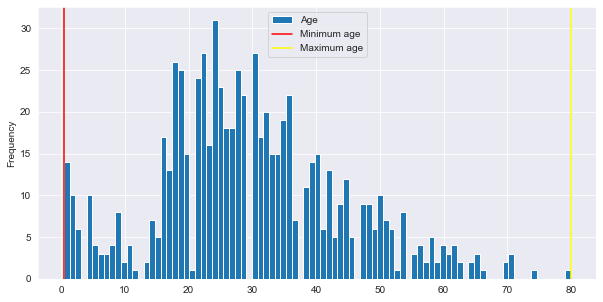

In [146]:
## Your code here
unique_ages = dataset['Age'].unique().shape[0]
min_age = dataset.Age.min()
max_age = dataset.Age.max()
print('Minimum age of all passengers:', min_age)
print('Maximum age of all passengers:', max_age)
dataset['Age'].plot(kind='hist', bins=unique_ages, figsize=(10, 5));
plt.axvline(x=min_age, color='red')
plt.axvline(x=max_age, color='yellow')
plt.legend(['Age', 'Minimum age', 'Maximum age'])

Mean age: 29.69911764705882
Mean age among Males 30.72664459161148
Mean age among Females 27.915708812260537


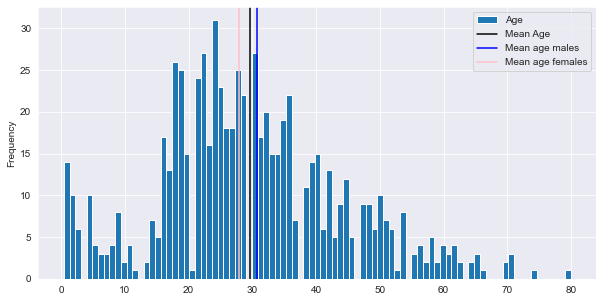

In [147]:
mean_age = dataset.Age.mean()
mean_age_males = dataset[dataset['Sex'] == 'male']['Age'].mean()
mean_age_females = dataset[dataset['Sex'] == 'female']['Age'].mean()
print('Mean age:', mean_age)
print('Mean age among Males', mean_age_males)
print('Mean age among Females', mean_age_females)
dataset['Age'].plot(kind='hist', bins=unique_ages, figsize=(10, 5));
plt.axvline(x=mean_age, color='black')
plt.axvline(x=mean_age_males, color='blue')
plt.axvline(x=mean_age_females, color='pink')
plt.legend(['Age', 'Mean Age', 'Mean age males', 'Mean age females'])
plt.show()

Как можно заметить по графику вычисленным данным, кол-во людей, которые имеют максимальный возраст намного меньше, чем тех, кто имеет минимальный возраст. Возраст, который имеют большее кол-во людей по сравнению с другими возрастами - примерно 25(32 человека имеют такой возраст). Средний возраст мужчин намного ближе к общему среднему возрасту, чем средний возраст женщин. Мы также имеем небольшое кол-во людей, которые имеют максимальный возраст(80), что значительно влияет на значение среднего возраста и средний возраст имеет не самое большое кол-во людей(пик приходится на возраст 25 лет).

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [148]:
dataset.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [149]:
## Your code here
new_data = dataset['Name'].str.split(' ')
tmp_arr = list()
for i in range(len(new_data)):
    for word in new_data[i]:
        if '.' in word:
            tmp_arr.append(word)
new_data = pd.Series(tmp_arr)
print('Not unique titles:', len(new_data))
print('Unique titles:', len(new_data.unique()))
print('All unique titles:')
display(new_data.unique())

Not unique titles: 892
Unique titles: 18
All unique titles:


array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'L.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



Grouped data: Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


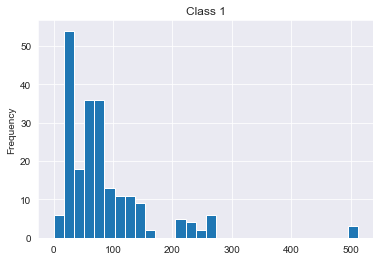

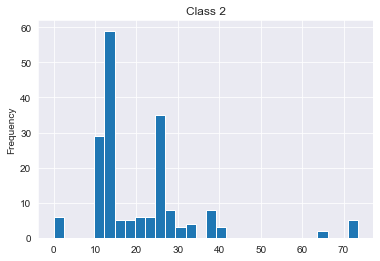

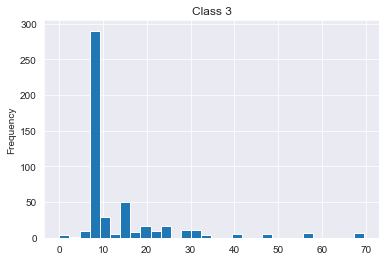

In [150]:
grouped_fare_per_class = dataset.groupby('Pclass')['Fare'].mean()
print('Grouped data:', grouped_fare_per_class)
dataset.query('Pclass==1')['Fare'].plot(kind='hist', bins=30, title='Class 1');
plt.show()
dataset.query('Pclass==2')['Fare'].plot(kind='hist', bins=30, title='Class 2');
plt.show()
dataset.query('Pclass==3')['Fare'].plot(kind='hist', bins=30, title='Class 3');
plt.show()

Как можно заметить по распределению цены в зависимости от разных классов, самая большая цена - цена класса 1(максимальная составляет 500). А самая небольшая максимальная цена - цена класса 3(значение не доходит до 70). Самое большое кол-во людей приобрело билет класса 3(чуть меньше 300 человек). Можно заметить, что с увеличением цены класса 3 кол-во людей, приобретавших билеты не увеличивалось, в отличие от например класса 2 и класса 1. Пик приобретения билета во всех 3 классах находится в начале роста цены.
Средняя цена:
 - для класса 1: 84.154687
 - для класса 2: 20.662183
 - для класса 3: 13.675550

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

Grouped data: Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


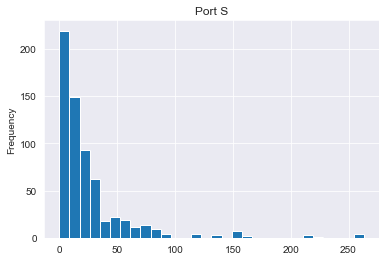

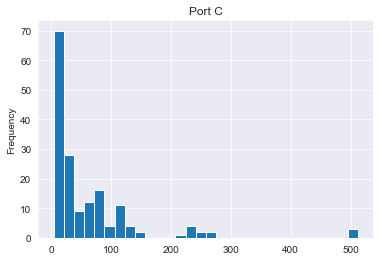

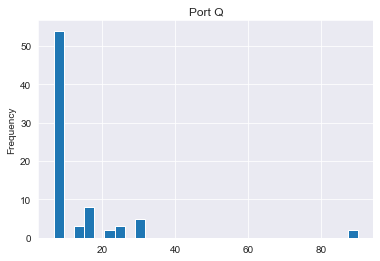

In [151]:
## You code here
grouped_fare_per_class = dataset.groupby('Embarked')['Fare'].mean()
print('Grouped data:', grouped_fare_per_class)
unique_ports = dataset[~dataset['Embarked'].isna()]['Embarked'].unique()
dataset.query('Embarked==@unique_ports[0]')['Fare'].plot(kind='hist', bins=30, title='Port S');
plt.show()
dataset.query('Embarked==@unique_ports[1]')['Fare'].plot(kind='hist', bins=30, title='Port C');
plt.show()
dataset.query('Embarked==@unique_ports[2]')['Fare'].plot(kind='hist', bins=30, title='Port Q');
plt.show()

Для всех портов можно заметить пик в начале(самый большой в порте S). Это связано с тем, что больше всего человек возьмут билет с самой начальной ценой.
Средняя цена:
 - для порта S: 27.079812
 - для порта C: 59.954144
 - для порта Q: 13.276030

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

In [152]:
def make_hist(survived_status, sex=''):
    my_title = ''
    if survived_status == 1:
        my_title = 'Survived'
    else:
        my_title = 'Not survived'
    if sex == 'male' or sex == 'female':
        dataset.query('Survived == @survived_status and Sex == @sex ')['Age'].plot(kind='hist', bins=20,title=my_title + ' '+sex)
        plt.axvline(x=dataset.query('Survived == @survived_status and Sex == @sex ')['Age'].mean(), color='green');
        plt.legend(['Age', 'Mean value'])
    else:
        dataset.query('Survived == @survived_status')['Age'].plot(kind='hist', bins=20, title=my_title+' total');
        plt.axvline(x=dataset.query('Survived == @survived_status')['Age'].mean(), color='green');
    plt.show()

Pclass  Survived
1       0           43.695312
        1           35.368197
2       0           33.544444
        1           25.901566
3       0           26.555556
        1           20.646118
Name: Age, dtype: float64

Mean age of survived: 28.343689655172415
Mean age of not survived: 30.62617924528302
Mean age of survived of males: 27.276021505376345
Mean age of survived females: 28.84771573604061
Mean age of not survived males: 31.618055555555557
Mean age of not survived females: 25.046875


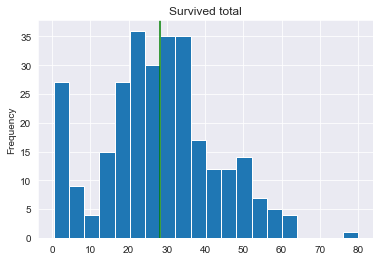

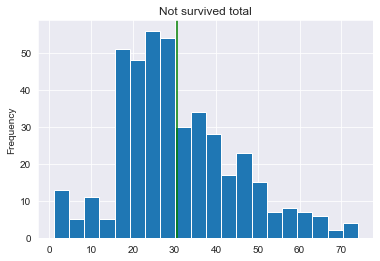

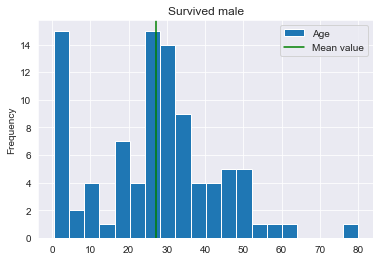

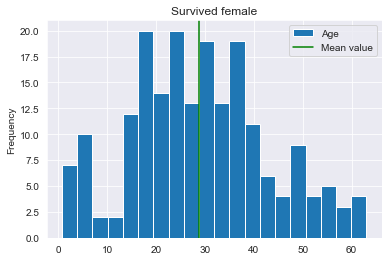

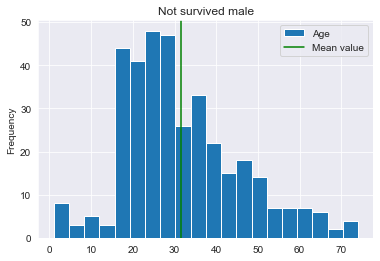

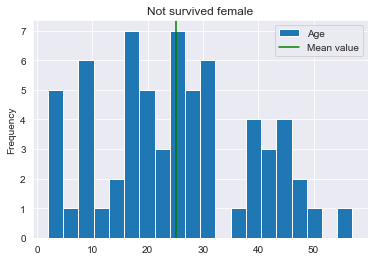

In [153]:
## You code here
mean_survived = dataset.query('Survived == 1')['Age'].mean()
mean_not_survived = dataset.query('Survived == 0')['Age'].mean()
mean_survived_male = dataset.query('Survived == 1 and Sex == "male"')['Age'].mean()
mean_survived_female = dataset.query('Survived == 1 and Sex == "female"')['Age'].mean()
mean_not_survived_male = dataset.query('Survived == 0 and Sex == "male"')['Age'].mean()
mean_not_survived_female = dataset.query('Survived == 0 and Sex == "female"')['Age'].mean()

grouped_by_class_survived = dataset.groupby(['Pclass', 'Survived']).Age.mean()
display(grouped_by_class_survived)

mean_survived_1 = grouped_by_class_survived[1][1]
mean_survived_2 = grouped_by_class_survived[2][1]
mean_survived_3 = grouped_by_class_survived[3][1]
mean_not_survived_1 = grouped_by_class_survived[1][0]
mean_not_survived_2 = grouped_by_class_survived[2][0]
mean_not_survived_3 = grouped_by_class_survived[3][0]

print('Mean age of survived:', dataset.query('Survived == 1')['Age'].mean())
print('Mean age of not survived:', dataset.query('Survived == 0')['Age'].mean())
print('Mean age of survived of males:', dataset.query('Survived == 1 and Sex == "male"')['Age'].mean())
print('Mean age of survived females:', dataset.query('Survived == 1 and Sex == "female"')['Age'].mean())
print('Mean age of not survived males:', dataset.query('Survived == 0 and Sex == "male"')['Age'].mean())
print('Mean age of not survived females:', dataset.query('Survived == 0 and Sex == "female"')['Age'].mean())





make_hist(1)
make_hist(0)
make_hist(1, 'male')
make_hist(1, 'female')
make_hist(0,'male')
make_hist(0,'female')


Как можно заметить по графику, среднее значение на всех 6 графиках примерно 30 лет.У выживших мужчин и невыживших женщин пик совпадает со средним значением.В остальных случаях среднее значение находиться близко к пику. Можно также заметить, что среди выживших много людей до 20 лет(график выживших).